In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv(r'../datasets/Credit Risk Benchmark Dataset.csv')

In [3]:
print(df.head())

   rev_util   age  late_30_59  debt_ratio  monthly_inc  open_credit  late_90  \
0  0.006999  38.0         0.0    0.302150       5440.0          4.0      0.0   
1  0.704592  63.0         0.0    0.471441       8000.0          9.0      0.0   
2  0.063113  57.0         0.0    0.068586       5000.0         17.0      0.0   
3  0.368397  68.0         0.0    0.296273       6250.0         16.0      0.0   
4  1.000000  34.0         1.0    0.000000       3500.0          0.0      0.0   

   real_estate  late_60_89  dependents  dlq_2yrs  
0          1.0         0.0         3.0         0  
1          1.0         0.0         0.0         0  
2          0.0         0.0         0.0         0  
3          2.0         0.0         0.0         0  
4          0.0         0.0         1.0         0  


In [4]:
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB
None


In [5]:
print(df.describe(include='all'))

           rev_util           age    late_30_59    debt_ratio    monthly_inc  \
count  16714.000000  16714.000000  16714.000000  16714.000000   16714.000000   
mean       4.799862     48.798672      1.110267     30.980298    6118.120258   
std      204.062345     13.906078      7.172890    719.694859    5931.841779   
min        0.000000     21.000000      0.000000      0.000000       0.000000   
25%        0.082397     38.000000      0.000000      0.155971    3128.500000   
50%        0.443080     48.000000      0.000000      0.322299    5000.000000   
75%        0.926637     58.000000      1.000000      0.533426    7573.000000   
max    22000.000000    101.000000     98.000000  61106.500000  250000.000000   

        open_credit       late_90   real_estate    late_60_89    dependents  \
count  16714.000000  16714.000000  16714.000000  16714.000000  16714.000000   
mean       8.503709      0.863827      1.047445      0.734354      0.944358   
std        5.370965      7.167576      1.2

In [6]:
# List of columns that are counts and should be integers
int_cols = ['age', 'late_30_59', 'open_credit', 'late_90', 
            'real_estate', 'late_60_89', 'dependents']

# Change data types for memory efficiency and semantic correctness
for col in int_cols:
    df[col] = df[col].astype(int)

print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
rev_util       float64
age              int64
late_30_59       int64
debt_ratio     float64
monthly_inc    float64
open_credit      int64
late_90          int64
real_estate      int64
late_60_89       int64
dependents       int64
dlq_2yrs         int64
dtype: object


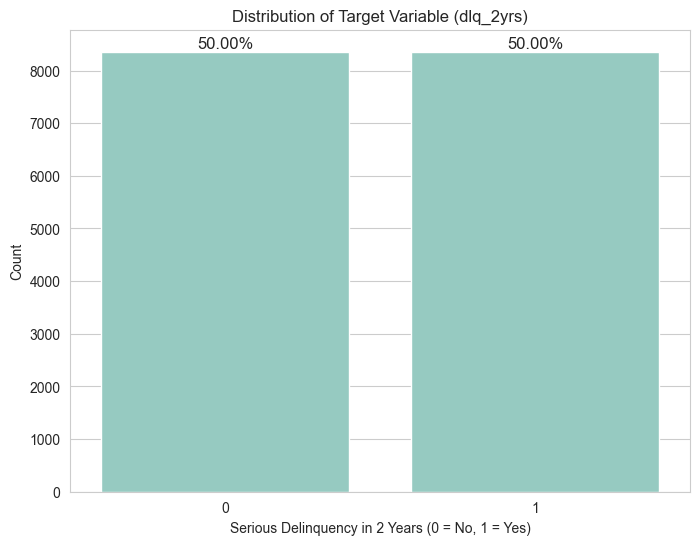

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='dlq_2yrs', data=df)
plt.title('Distribution of Target Variable (dlq_2yrs)')
plt.xlabel('Serious Delinquency in 2 Years (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Calculate the percentage
total = len(df)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5,
            '{:1.2f}%'.format(100*height/total),
            fontsize=12, ha='center', va='bottom')
plt.show()

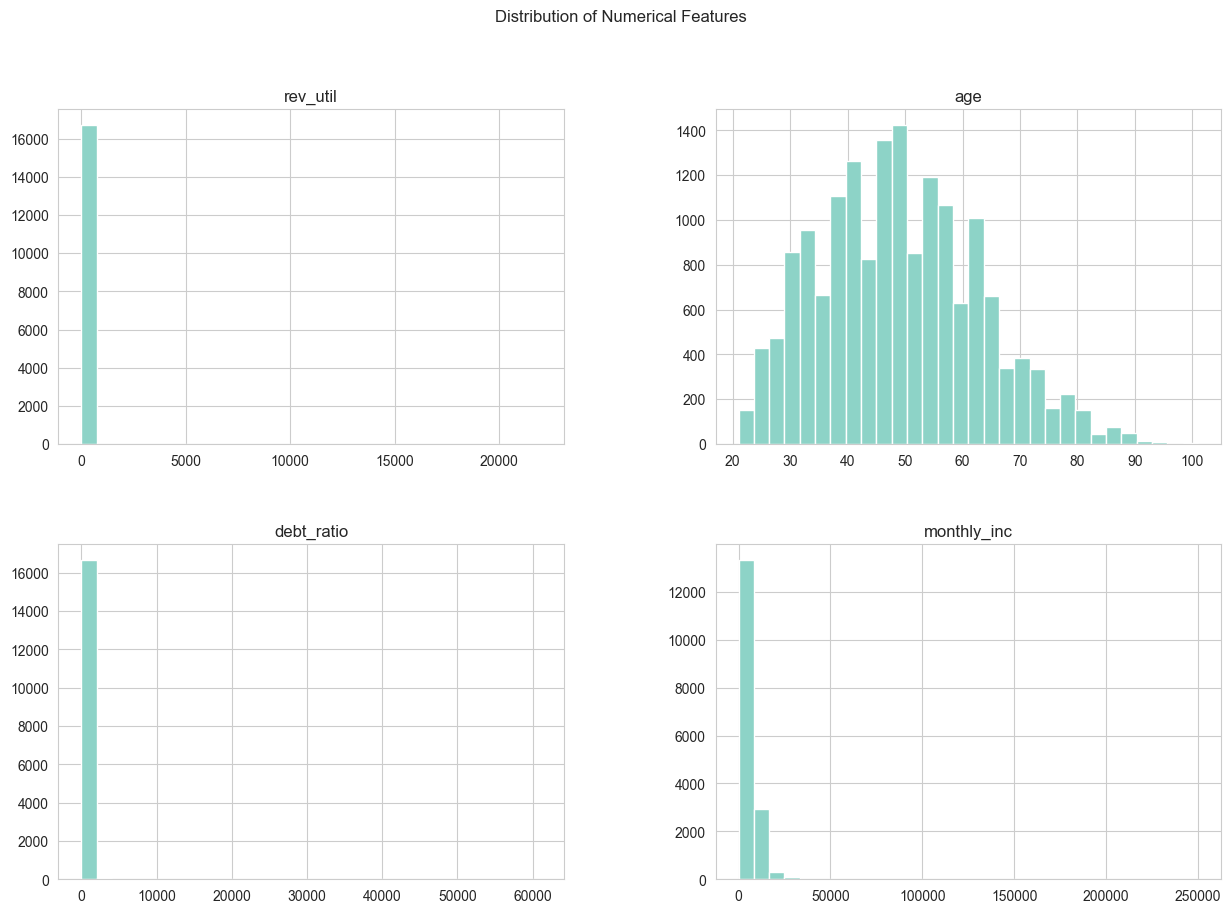

In [8]:
# Select numerical features for analysis
numerical_features = ['rev_util', 'age', 'debt_ratio', 'monthly_inc']

df[numerical_features].hist(bins=30, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

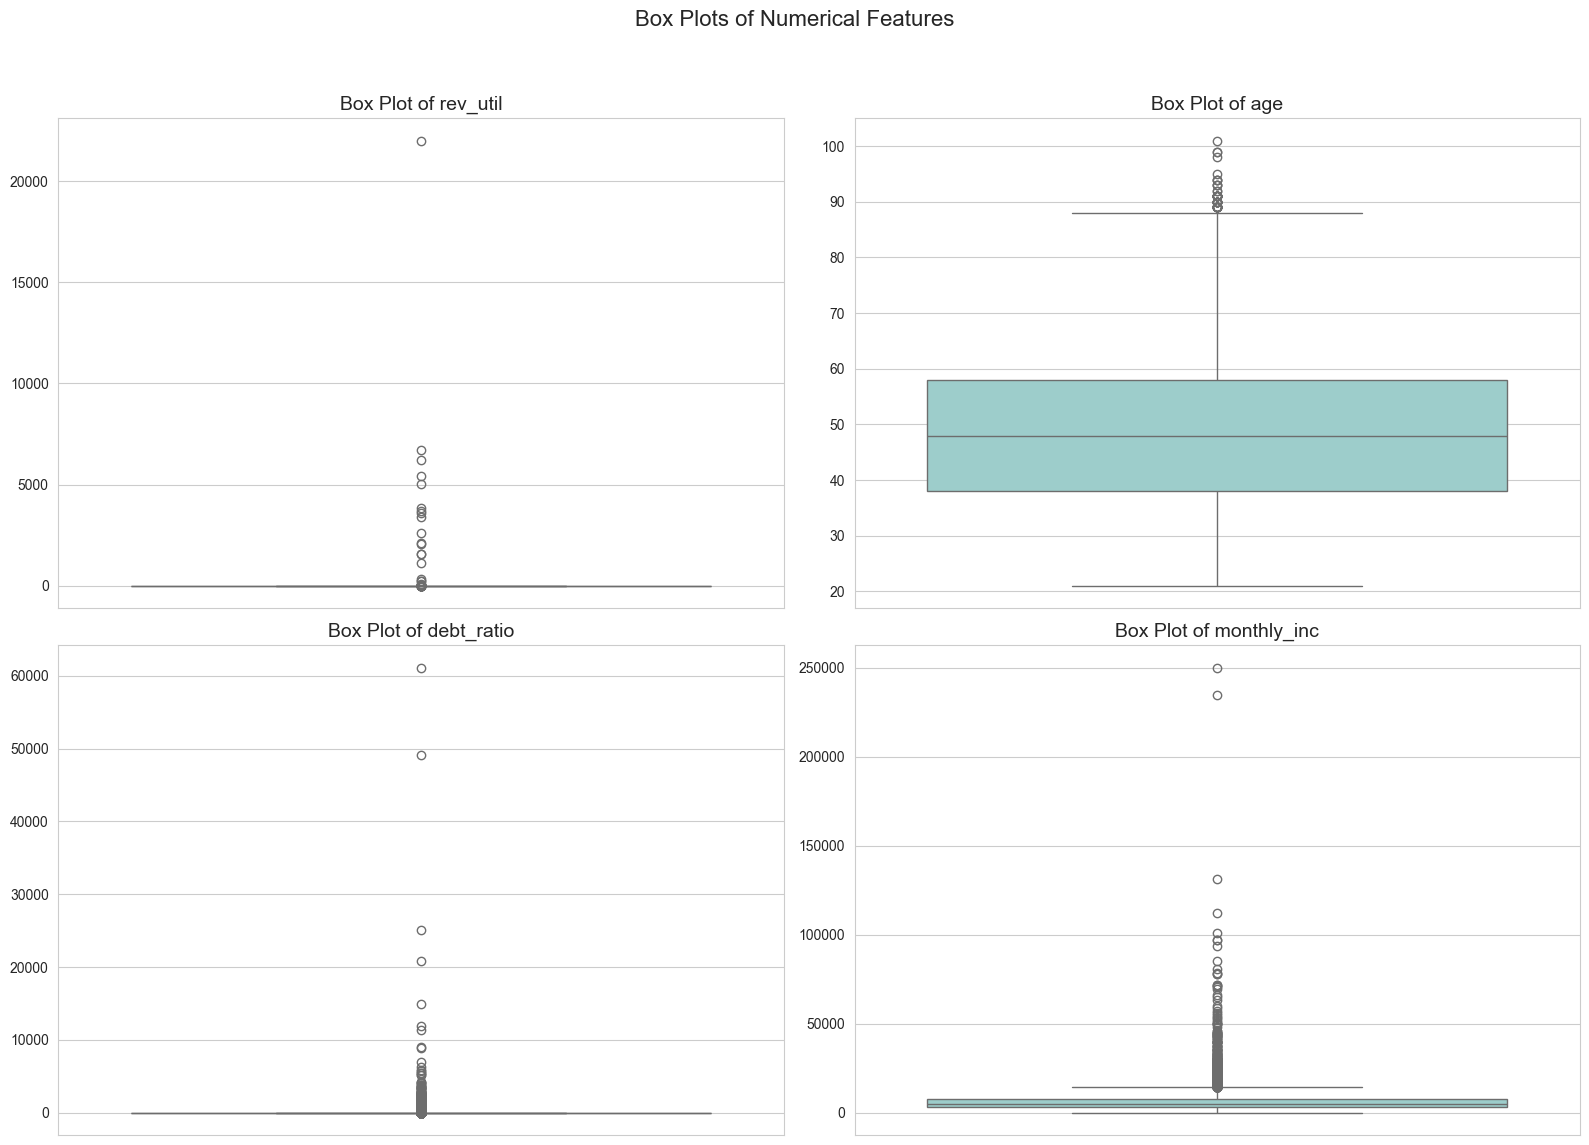

In [9]:
# List of numerical features to plot
numerical_features = ['rev_util', 'age', 'debt_ratio', 'monthly_inc']

# Create box plots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col], color='#95d5d2')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.ylabel('')

plt.suptitle('Box Plots of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

In [10]:
# Filter the DataFrame to see records with zero income
df_zero_income = df[df['monthly_inc'] == 0]

# Display the summary statistics for this specific group
print("Summary for Borrowers with Zero Monthly Income:")
print(df_zero_income[['age', 'debt_ratio', 'open_credit', 'dlq_2yrs']].describe())

Summary for Borrowers with Zero Monthly Income:
              age    debt_ratio  open_credit    dlq_2yrs
count  181.000000    181.000000   181.000000  181.000000
mean    45.596685   2127.447514     7.060773    0.364641
std     15.583032   4701.812022     5.297972    0.482664
min     21.000000      0.000000     0.000000    0.000000
25%     31.000000    130.000000     3.000000    0.000000
50%     45.000000   1031.000000     6.000000    0.000000
75%     57.000000   2398.000000    10.000000    1.000000
max     94.000000  49112.000000    28.000000    1.000000


In [11]:
print(df.sort_values(by='rev_util', ascending=False)['rev_util'].head(30))

2297     22000.000000
3202      6726.000000
14688     6190.000000
4886      5423.000000
7149      5015.000000
15541     3818.000000
3321      3677.000000
13221     3572.000000
8806      3383.000000
15421     2583.000000
6635      2120.000000
8394      2066.000000
8753      1577.000000
6997      1563.000000
8452      1143.000000
4916       356.000000
13105      250.583333
6396       219.000000
16641       73.846154
11310       29.784884
9231        14.540918
12103       12.462747
11900       12.037116
10016       11.385230
3362         8.851852
9950         8.599600
16045        7.308970
9573         5.214381
13405        4.237015
2771         3.996008
Name: rev_util, dtype: float64


In [12]:
# Create binary flag for zero-income
df['is_income_zero'] = (df['monthly_inc'] == 0).astype(int)

# Impute debt_ratio for zero-income group
df.loc[df['is_income_zero'] == 1, 'debt_ratio'] = 0

# Cap rev_util outliers at 99th percentile
p99_rev_util = df['rev_util'].quantile(0.99)
df['rev_util'] = df['rev_util'].clip(upper=p99_rev_util)

# Cap the debt_ratio column at the 99th percentile
p99_debt_ratio = df['debt_ratio'].quantile(0.99)
df['debt_ratio'] = df['debt_ratio'].clip(upper=p99_debt_ratio)

print("Feature 'is_income_zero' created and outliers handled.")
print("\nNew summary statistics for 'debt_ratio' and 'rev_util':")
print(df[['debt_ratio', 'rev_util']].describe())

Feature 'is_income_zero' created and outliers handled.

New summary statistics for 'debt_ratio' and 'rev_util':
         debt_ratio      rev_util
count  16714.000000  16714.000000
mean       0.409917      0.498760
std        0.435070      0.406443
min        0.000000      0.000000
25%        0.148926      0.082397
50%        0.314952      0.443080
75%        0.522260      0.926637
max        2.932614      1.447575


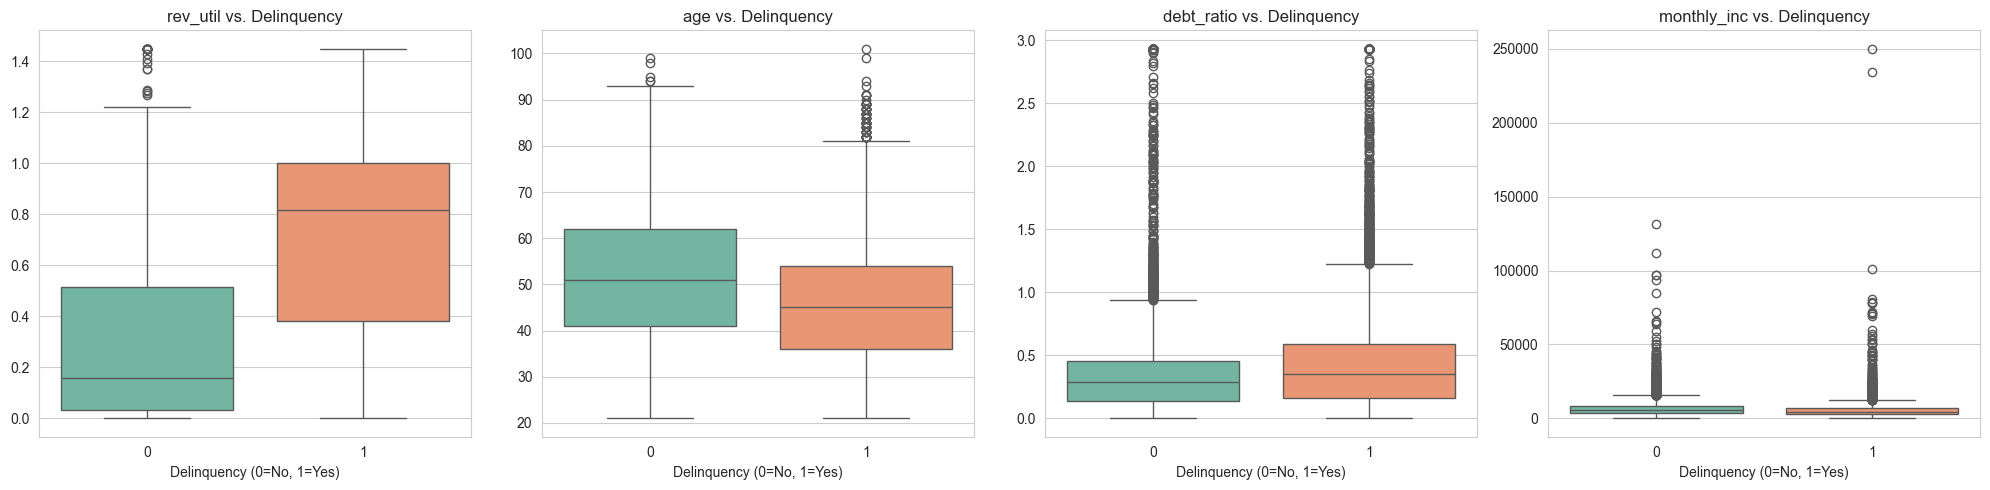

In [13]:
numerical_features = ['rev_util', 'age', 'debt_ratio', 'monthly_inc']

# Sided-by-side box plots for each feature against the target
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, col in enumerate(numerical_features):
    sns.boxplot(x='dlq_2yrs', y=col, data=df, ax=axes[i], hue='dlq_2yrs', palette="Set2", legend=False)
    axes[i].set_title(f'{col} vs. Delinquency')
    axes[i].set_xlabel('Delinquency (0=No, 1=Yes)')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

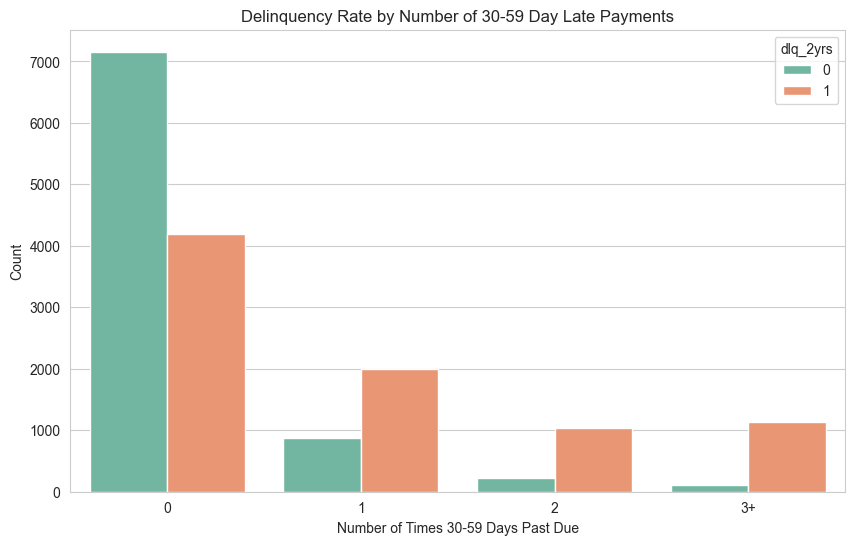

In [14]:
df_plot = df.copy()
df_plot['late_30_59_cat'] = df_plot['late_30_59'].apply(lambda x: x if x < 3 else '3+')

plt.figure(figsize=(10, 6))
sns.countplot(x='late_30_59_cat', hue='dlq_2yrs', data=df_plot, 
              order=sorted(df_plot['late_30_59_cat'].unique().astype(str)),
              palette="Set2")
plt.title('Delinquency Rate by Number of 30-59 Day Late Payments')
plt.xlabel('Number of Times 30-59 Days Past Due')
plt.ylabel('Count')
plt.show()

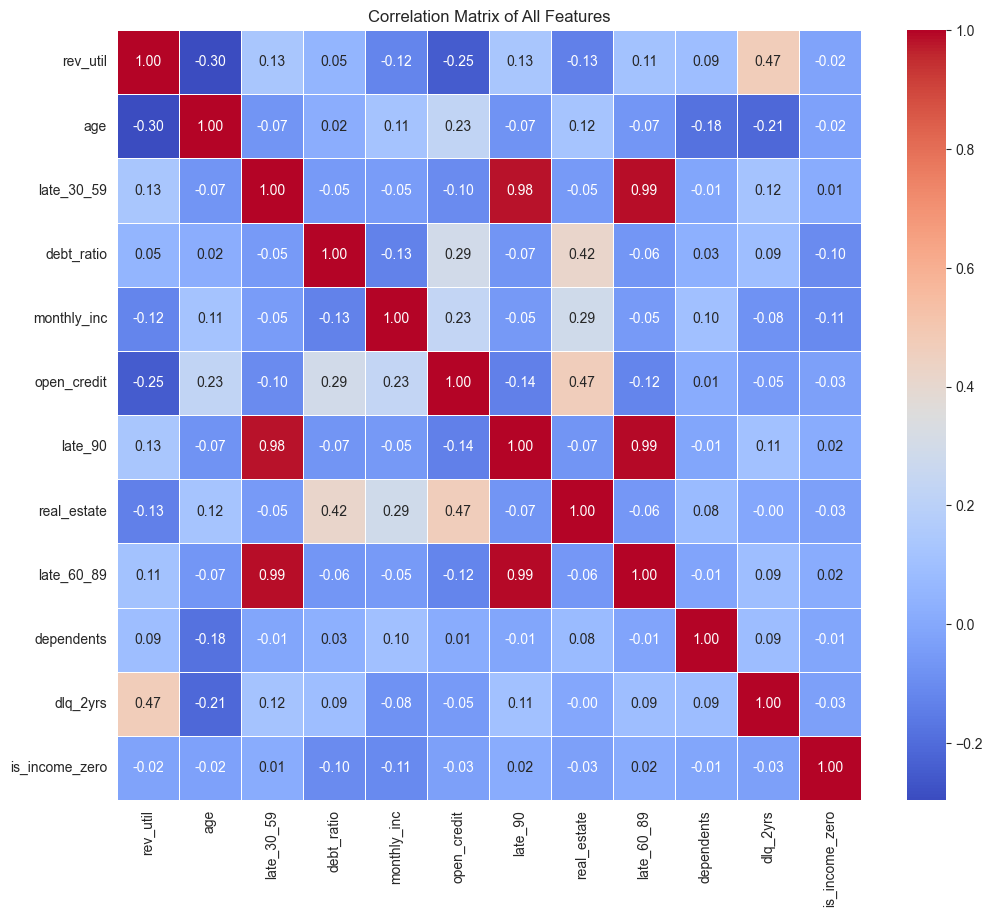

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Features')
plt.show()

In [17]:
# Value counts for late columns
late_cols = ['late_30_59', 'late_60_89', 'late_90']
print("Value counts for 'late' columns:")
for col in late_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().sort_index())

Value counts for 'late' columns:

--- late_30_59 ---
late_30_59
0     11346
1      2873
2      1253
3       597
4       304
5       140
6        69
7        25
8         8
9         4
10        3
11        1
12        1
13        1
96        3
98       86
Name: count, dtype: int64

--- late_60_89 ---
late_60_89
0     14200
1      1691
2       485
3       161
4        53
5        18
6        12
7         3
8         1
11        1
96        3
98       86
Name: count, dtype: int64

--- late_90 ---
late_90
0     13626
1      1667
2       675
3       327
4       169
5        67
6        38
7        22
8        10
9        11
10        5
11        3
12        1
13        2
14        1
17        1
96        3
98       86
Name: count, dtype: int64


In [19]:
conditions = [
    (df['late_90'] >= 96),
    (df['late_60_89'] >= 96),
    (df['late_30_59'] >= 96),
    (df['late_90'] > 0),
    (df['late_60_89'] > 0),
    (df['late_30_59'] > 0)
]
choices = [
    'Special Code Late', 
    'Special Code Late', 
    'Special Code Late', 
    '90+ Days Late', 
    '60-89 Days Late', 
    '30-59 Days Late'
]
df['worst_delinquency_status'] = np.select(conditions, choices, default='No Delinquency')

# Drop original columns to avoid multicollinearity
df_model = df.drop(columns=['late_30_59', 'late_60_89', 'late_90'])

# One-Hot Encode
df_model = pd.get_dummies(df_model, columns=['worst_delinquency_status'], drop_first=True)

print("Data ready for modeling:")
df_model.head()

Data ready for modeling:


,rev_util,age,debt_ratio,monthly_inc,open_credit,real_estate,dependents,dlq_2yrs,is_income_zero,worst_delinquency_status_60-89 Days Late,worst_delinquency_status_90+ Days Late,worst_delinquency_status_No Delinquency,worst_delinquency_status_Special Code Late
0,0.006999,38,0.302150,5440.0,4,1,3,0,0,False,False,True,False
1,0.704592,63,0.471441,8000.0,9,1,0,0,0,False,False,True,False
2,0.063113,57,0.068586,5000.0,17,0,0,0,0,False,False,True,False
3,0.368397,68,0.296273,6250.0,16,2,0,0,0,False,False,True,False
4,1.000000,34,0.000000,3500.0,0,0,1,0,0,False,False,False,False
